# UK Traffic Accidents Severity Classification
4IZ565 – Programming for Data Science in Python

Spring Semester 2023/2024 Coursework

Authors: Terka Lukešová, Jan Štipl

## Dataset Description
The dataset contains statistics on traffic accidents in the UK, including many attributes, such as the route category and hazards, the vehicles involved, and some information about the drivers. Our goal will be to predict the target attribute Accident Severity, whose values are Slight/Serious/Fatal.

Dataset source: https://www.kaggle.com/datasets/tsiaras/uk-road-safety-accidents-and-vehicles

## Exploratory Data Analysis

### Initial settings

In [1]:
import random
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sklearn.set_config(transform_output="pandas")

RANDOM_STATE = 42 # used throughout the notebook to make the results reproducable
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

### Load CSV tables and merge them 

In [2]:
# For speed during testing load only small percentage of the data
# p = 0.001  # 1% of the lines
# skip_rows = lambda i: i > 0 and random.random() > p
skip_rows = None

accidents_df = pd.read_csv("./data/Accident_Information.csv",
                           skiprows=skip_rows)
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 3169: invalid start byte
vehicle_df = pd.read_csv("./data/Vehicle_Information.csv", encoding="latin1")

/tmp/ipykernel_813345/452454692.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents_df = pd.read_csv("./data/Accident_Information.csv",


In [3]:
df = pd.merge(accidents_df, vehicle_df, on="Accident_Index", how="inner")
del vehicle_df
del accidents_df

### Overview

In [ ]:
df

In [6]:
df.dtypes

Accident_Index                                  object
1st_Road_Class                                  object
1st_Road_Number                                float64
2nd_Road_Class                                  object
2nd_Road_Number                                float64
Accident_Severity                               object
Carriageway_Hazards                             object
Date                                            object
Day_of_Week                                     object
Did_Police_Officer_Attend_Scene_of_Accident    float64
Junction_Control                                object
Junction_Detail                                 object
Latitude                                       float64
Light_Conditions                                object
Local_Authority_(District)                      object
Local_Authority_(Highway)                       object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude 

In [ ]:
df.select_dtypes(include=['object']).nunique() # Count unique values in each non-numerical column

In [ ]:
df['Carriageway_Hazards'].unique()

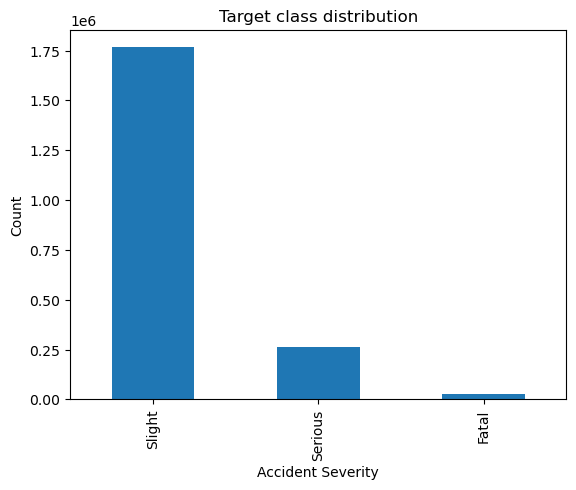

In [4]:
target_variable = 'Accident_Severity'
df[target_variable].value_counts().plot.bar()
plt.title('Target class distribution')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()

<Axes: title={'center': 'Number_of_Casualties'}, xlabel='Accident_Severity'>

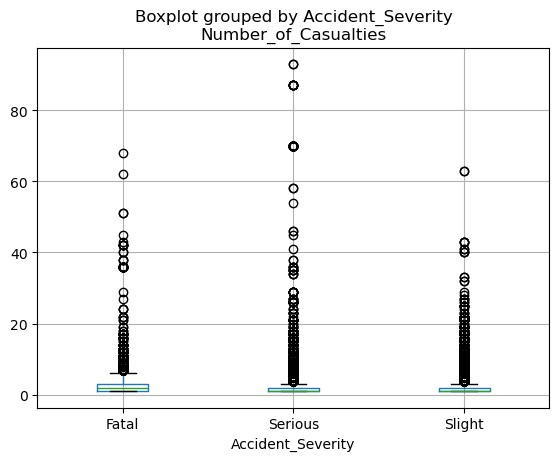

In [5]:
df.boxplot('Number_of_Casualties', by=target_variable)

<Axes: title={'center': 'Number_of_Vehicles'}, xlabel='Accident_Severity'>

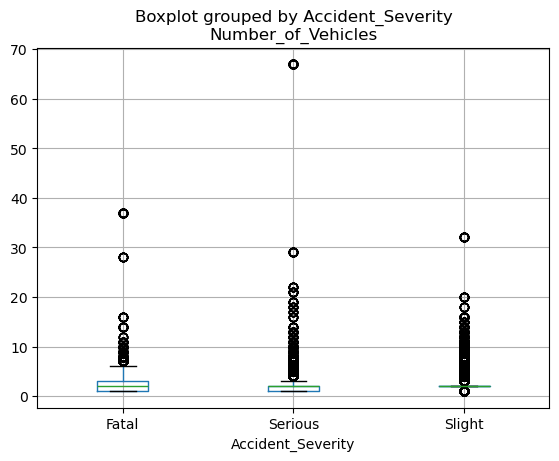

In [7]:
df.boxplot('Number_of_Vehicles', by=target_variable)

In [8]:
df.loc[df['Number_of_Casualties'] > 80]

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year_x,InScotland,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y
882171,201106X047581,Motorway,62.000,NaN,0.000,Serious,None,2011-06-20,Monday,1.000,Data missing or out of range,Not at junction or within 20 metres,53.476,Daylight,Salford,Salford,373615.000,397818.000,-2.399,E01005732,87,5,0.000,0.000,Greater Manchester,Dry,Dual carriageway,None,70.000,15:10,Rural,Fine no high winds,2011,No,26 - 35,13.000,Data missing or out of range,NaN,1160.000,None,None,Journey as part of work,Not at or within 20 metres of junction,EOS,NaN,Heavy oil,Male,Skidded,No tow/articulation,Did not leave carriageway,0.000,Slowing or stopping,1,Bus or coach (17 or more pass seats),No,Front,2011
882172,201106X047581,Motorway,62.000,NaN,0.000,Serious,None,2011-06-20,Monday,1.000,Data missing or out of range,Not at junction or within 20 metres,53.476,Daylight,Salford,Salford,373615.000,397818.000,-2.399,E01005732,87,5,0.000,0.000,Greater Manchester,Dry,Dual carriageway,None,70.000,15:10,Rural,Fine no high winds,2011,No,56 - 65,6.000,Urban area,7.000,7300.000,None,None,Journey as part of work,Not at or within 20 metres of junction,VOLVO,NaN,Heavy oil,Male,Skidded,No tow/articulation,Did not leave carriageway,0.000,Slowing or stopping,2,Bus or coach (17 or more pass seats),No,Front,2011
882173,201106X047581,Motorway,62.000,NaN,0.000,Serious,None,2011-06-20,Monday,1.000,Data missing or out of range,Not at junction or within 20 metres,53.476,Daylight,Salford,Salford,373615.000,397818.000,-2.399,E01005732,87,5,0.000,0.000,Greater Manchester,Dry,Dual carriageway,None,70.000,15:10,Rural,Fine no high winds,2011,No,46 - 55,6.000,Urban area,1.000,1998.000,None,None,Journey as part of work,Not at or within 20 metres of junction,FORD,TRANSIT 280 SWB,Heavy oil,Male,Skidded,No tow/articulation,Did not leave carriageway,0.000,Slowing or stopping,3,Van / Goods 3.5 tonnes mgw or under,No,Front,2011
882174,201106X047581,Motorway,62.000,NaN,0.000,Serious,None,2011-06-20,Monday,1.000,Data missing or out of range,Not at junction or within 20 metres,53.476,Daylight,Salford,Salford,373615.000,397818.000,-2.399,E01005732,87,5,0.000,0.000,Greater Manchester,Dry,Dual carriageway,None,70.000,15:10,Rural,Fine no high winds,2011,No,56 - 65,5.000,Urban area,1.000,2463.000,None,None,Journey as part of work,Not at or within 20 metres of junction,VAUXHALL,MOVANO 3500 CDTI MWB,Heavy oil,Male,None,No tow/articulation,Did not leave carriageway,0.000,Slowing or stopping,4,Van / Goods 3.5 tonnes mgw or under,No,Back,2011
882175,201106X047581,Motorway,62.000,NaN,0.000,Serious,None,2011-06-20,Monday,1.000,Data missing or out of range,Not at junction or within 20 metres,53.476,Daylight,Salford,Salford,373615.000,397818.000,-2.399,E01005732,87,5,0.000,0.000,Greater Manchester,Dry,Dual carriageway,None,70.000,15:10,Rural,Fine no high winds,2011,No,36 - 45,3.000,Urban area,9.000,2198.000,None,None,Journey as part of work,Not at or within 20 metres of junction,FORD,TRANSIT 110 T300S FWD,Heavy oil,Male,N

### Problems
* Unclassified and NaN in the same columns -> we have to merge
* Categorical values and not one-hot encoded
* The classes are very imbalanced

## Data preprocessing

### Separate the target class from attributes

In [ ]:
X, y = df.loc[:, df.columns != target_variable], df[target_variable]
del df

The plot shows that we have to deal with imbalanced classes.

### Consolidate string values Unknown/Unclassified to NaN

In [ ]:
X.replace(
    [
        "Not known",
        "Data missing or out of range",
        "Unclassified"
    ],
    np.nan, inplace=True)
X.fillna(np.nan, inplace=True)

### Train-test split
Our train-test ratio is 80:20. We make use of stratification because the target classes are imbalanced.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=RANDOM_STATE)
del X
del y

In [ ]:
y_train.value_counts().plot.bar()
plt.title('Target class distribution (train data)')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()

y_test.value_counts().plot.bar()
plt.title('Target class distribution (test data)')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()

### Drop columns with too many missing values
The columns are identified on the train set, the drop is then applied to the test set too

In [ ]:
# Get percentage of NaN values for each column
na_percentage = X_train.isna().mean() * 100
na_percentage.sort_values(ascending=False, inplace=True)
na_percentage

In [ ]:
to_drop = na_percentage[na_percentage > 40]
to_drop

In [ ]:
X_train.drop(columns=to_drop.index, inplace=True)
X_test.drop(columns=to_drop.index, inplace=True)

### Transformers

In [ ]:
# Extract month from date
month_extractor = lambda x: pd.to_datetime(x['Date'], format='%Y-%m-%d').dt.month
X_train['month'] = month_extractor(X_train)
X_test['month'] = month_extractor(X_test)

# Extract hour from time
hour_extractor = lambda x: pd.to_datetime(x['Time'], format='%H:%M').dt.hour
X_train['hour'] = month_extractor(X_train)
X_test['hour'] = month_extractor(X_test)

In [ ]:
numerical_variables = [
     # 'Number_of_Casualties', # Leaks info about accident severity
     # 'Number_of_Vehicles', # Leaks info about accident severity
    'Speed_limit',
    'Age_of_Vehicle',
    'Engine_Capacity_.CC.',
]

nominal_variables = [
    'Day_of_Week',
    'month',
    'hour',
    'Carriageway_Hazards',
    'Junction_Detail',
    'Pedestrian_Crossing-Human_Control',
    'Pedestrian_Crossing-Physical_Facilities',
    'Road_Type',
    'Special_Conditions_at_Site',
    'Urban_or_Rural_Area',
    'Weather_Conditions',
    'Driver_Home_Area_Type',
    'Hit_Object_in_Carriageway',
    'Hit_Object_off_Carriageway',
    'Junction_Location',
    'make',
    'Propulsion_Code',
    'Sex_of_Driver',
    'Skidding_and_Overturning',
    'Towing_and_Articulation',
    'Vehicle_Leaving_Carriageway',
    'Vehicle_Location.Restricted_Lane',
    'Vehicle_Manoeuvre',
    'Vehicle_Type',
    'Was_Vehicle_Left_Hand_Drive',
    'X1st_Point_of_Impact',
]

# Order of the values can be determined lexicographically
ordinal_variables_auto = [
    'Age_Band_of_Driver',
    'Driver_IMD_Decile',
]

In [ ]:
# Correct order must be set manually
ordinal_variables_manual = [
    '1st_Road_Class',
    'Junction_Control',
    'Light_Conditions',
    'Road_Surface_Conditions',
]

road_class_categories = ['Motorway', 'A(M)', 'A', 'B', 'C']

junction_control_categories = [
    'Not at junction or within 20 metres',
    'Authorised person',
    'Auto traffic signal',
    'Stop sign',
    'Give way or uncontrolled',
]

light_conditions_categories = [
    'Daylight',
    'Darkness - lights lit',
    'Darkness - lighting unknown',
    'Darkness - lights unlit',
    'Darkness - no lighting',
]

road_surface_conditions_categories = [
    'Dry',
    'Wet or damp',
    'Snow',
    'Frost or ice',
    'Flood over 3cm. deep',
]

manual_categories = [
    road_class_categories,
    junction_control_categories,
    light_conditions_categories,
    road_surface_conditions_categories,
]

In [ ]:
X_train.filter(nominal_variables + ordinal_variables_auto + ordinal_variables_manual).nunique()

In [ ]:
from sklearn.compose import ColumnTransformer  # applies transformers to columns
from sklearn.pipeline import Pipeline  # assemble several steps
from sklearn.impute import SimpleImputer  # replace missing values using a descriptive statistic (e.g. mean, median,...)
from sklearn.preprocessing import OrdinalEncoder  # encode categorical features as an integer array
from sklearn.preprocessing import OneHotEncoder  # encode categorical features as a one-hot numeric array
from sklearn.preprocessing import StandardScaler  # standardize features by removing the mean and scaling to unit variance

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False)),
])

ord_pipe_auto = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder()),
])

ord_pipe_manual = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(categories=manual_categories)),
])

transformers_list = [
    ('numerical', num_pipe, numerical_variables),
    ('nominal', cat_pipe, nominal_variables),
    ('ordinal_auto', ord_pipe_auto, ordinal_variables_auto),
    ('ordinal_manual', ord_pipe_manual, ordinal_variables_manual),
]

column_transformer = ColumnTransformer(transformers_list,
                                       remainder='drop',
                                       n_jobs=-1,
# If True, ColumnTransformer.get_feature_names_out will prefix all feature names with the name of the transformer that generated that feature.
                                       verbose_feature_names_out=False,
                                       verbose=True)

#X_train_transformed = column_transformer.fit_transform(X_train)
#X_test_transformed = column_transformer.transform(X_test)

#del X_train
#del X_test

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
label_encoder.classes_

## Modeling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

decision_tree = DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced')
feaure_selection = RFE(estimator=decision_tree, n_features_to_select=50, step=1)

### Dummy Classifiers

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf_stratified = DummyClassifier(strategy='stratified', random_state=RANDOM_STATE)
dummy_clf_stratified.fit(X_train, y_train)

In [ ]:
dummy_clf_mostfrequent = DummyClassifier(strategy='most_frequent')
dummy_clf_mostfrequent.fit(X_train, y_train)

### Logistic Regression

In [ ]:
param_grid_regression = {
    'clf__C': (0.01, 0.1, 1, 10, 100, 1000),
    'clf__solver': ('lbfgs', 'sag', 'saga'),
}

classification_pipeline_regression = Pipeline([
    ('select', feaure_selection),
    ('clf', LogisticRegression(penalty='l2', max_iter=1000, multi_class='multinomial', class_weight='balanced', random_state=RANDOM_STATE))
])

search_acc_regression = GridSearchCV(estimator=classification_pipeline_regression, param_grid=param_grid_regression, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

# search_acc_regression.fit(X_train_transformed, y_train)

In [ ]:
# search_acc_regression.best_estimator_

### Random Forest

In [ ]:
param_grid_forest = {
    'clf__criterion' : ('gini', 'entropy'),
    'clf__n_estimators': (100, 500),
    'clf__max_depth': (1, 4),
    'clf__max_features': ('sqrt', 'log2'),
    'clf__min_samples_leaf': (1, 4),
    'clf__min_samples_split': (2, 5),
}

classification_pipeline_forest = Pipeline([
    ('prep', column_transformer),
    ('clf', RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced')),
], memory='.')

search_f1_forest = GridSearchCV(
    estimator=classification_pipeline_forest,
    param_grid=param_grid_forest,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2
)

search_f1_forest.fit(X_train, y_train)

In [ ]:
best_estimator = search_acc_forest.best_estimator_
best_estimator

In [ ]:
search_acc_forest.best_score_

In [ ]:
data = list(zip(best_estimator.feature_names_in_, best_estimator.feature_importances_))
imp_score_sel = pd.DataFrame(data, columns=['predictor', 'importance']).sort_values(by='importance', ascending=False)
imp_score_sel[20::-1].plot.barh(x='predictor', y='importance')
plt.title('Feature importance')
plt.show()

## Results and Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import ConfusionMatrixDisplay

def print_report(ytrue, ypred):
    print(f'Accuracy: {accuracy_score(ytrue, ypred):.3f}')
    print(f'Balanced accuracy: {balanced_accuracy_score(ytrue, ypred):.3f}')
    print(classification_report(ytrue, ypred, zero_division=np.nan, target_names=label_encoder.classes_))

def plot_confusion_matrices(ytrue, ypred):
    ConfusionMatrixDisplay.from_predictions(ytrue, ypred, display_labels=label_encoder.classes_)
    plt.title('Confusion Matrix')
    plt.show()

    ConfusionMatrixDisplay.from_predictions(ytrue, ypred, normalize='true', display_labels=label_encoder.classes_)
    plt.title('Confusion Matrix (normalized)')
    plt.show()

def plot_pr_curves(ytrue, ypred, yproba):
    fig, axs = plt.subplots(1, len(label_encoder.classes_), figsize=(18, 5), sharey=True)
    fig.suptitle('Precision-Recall Curves')
    for i, cls in enumerate(label_encoder.classes_):
        y_test_i = y_test == i
        baseline = y_test_i.mean()
        axs[i].plot([0, 1], [baseline, baseline], linestyle='--')
        
        precision, recall, _ = precision_recall_curve(y_test_i, yproba[:,i])
        auc_score = auc(recall, precision)
        axs[i].plot(recall, precision)
        
        axs[i].set_title(f'{cls} (AUC = {auc_score:.2f})')
        axs[i].set_xlabel('Recall')
        axs[i].set_ylabel('Precision')

### Stratified Dummy Classifiers

In [ ]:
y_pred_dummy_stratified = dummy_clf_stratified.predict(X_test)
y_proba_dummy_stratified = dummy_clf_stratified.predict_proba(X_test)

print_report(y_test, y_pred_dummy_stratified)

### Most Frequent Dummy Classifier

In [ ]:
y_pred_dummy_mostfrequent = dummy_clf_mostfrequent.predict(X_test)
y_proba_dummy_mostfrequent = dummy_clf_mostfrequent.predict_proba(X_test)

print_report(y_test, y_pred_dummy_mostfrequent)

### Logistic Regression

### Random Forest

In [ ]:
y_pred_forest = search_f1_forest.predict(X_test)
y_proba_forest = search_f1_forest.predict_proba(X_test)

print_report(y_test, y_pred_forest)
plot_confusion_matrices(y_test, y_pred_forest)
plot_pr_curves(y_test, y_pred_forest, y_proba_forest)

### Conclusion
TODO
